# 파일 불러오기

In [1]:
import pandas as pd 

# 파일명이 suncare1_rc부터 suncare9_rc까지 반복
for i in range(1, 10):
    file_positive =  "C:/Users/82108/Desktop/final/" + f'suncare{i}_crc_positive.xlsx'
    file_negative =  "C:/Users/82108/Desktop/final/" + f'suncare{i}_crc_negative.xlsx'
    file_neutral =  "C:/Users/82108/Desktop/final/" + f'suncare{i}_crc_neutral.xlsx'
    # 파일명 생성
    globals()[f'suncare{i}_crc_positive_df'] = pd.read_excel(file_positive)  # 각 파일명에 해당하는 데이터프레임 생성
    globals()[f'suncare{i}_crc_negative_df'] = pd.read_excel(file_negative)
    globals()[f'suncare{i}_crc_neutral_df'] = pd.read_excel(file_neutral)

#suncare1에서 긍정인 문장들만 모음
suncare9_crc_positive_df 

,text
0,약간 상앗 빛 띠 같 저 형 약간 묽 편 습니다
1,약간 상앗 빛 띠 같 저 형 약간 묽 편 습니다
2,이거 하나 바르 피부 깨끗하 톤 업 엄청나 잘 되 발리 성 잘 발리 끈적이 거의 없 어요
3,상앗 빛 약간 띠 편 저 형 약간 묽 느낌 에요
4,상앗 빛 약간 띠 편 저 형 약간 묽 느낌 에요
...,...
395,자극 없이 순하 잘 발리 어요
396,톤 업 자연 되 자외선 차단 잘 되 어요
397,살짝 묽 안 뭉치 잘 발리 어요
398,정말 순하 잘 쓰 같 어요


# 긍정
- 긍정딕셔너리 중 suncare1..별로 긍정문장들   
    - suncare1_crc_positive_df['text']
- 문장들 중 단어들로 나눔(split())  
    - suncare1_crc_positive_words
- 단어들의 빈도 측정  
    - suncare1_crc_positive_words_freq
- 빈도데이터를 DataFrame을 변환   
    - suncare1_crc_positive_words_freq_df  #컬럼명은 ['단어','빈도']

In [2]:
# from collections import Counter


# # 직접적인 단어 빈도 계산
# # 텍스트를 공백 기준으로 분할하여 모든 단어를 리스트로 만듦
# suncare1_crc_positive_words = suncare1_crc_positive_df['text'].str.split().sum()
# # 단어들의 빈도를 계산
# suncare1_crc_positive_words_freq = Counter(suncare1_crc_positive_words)

# # 빈도 데이터를 데이터프레임으로 변환하여 정렬
# suncare1_crc_positive_words_freq_df = pd.DataFrame(suncare1_crc_positive_words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
# # 상위 10개 단어 출력
# suncare1_crc_positive_words_freq_df.head(30)


## 1. 

In [3]:
from collections import Counter

# 긍정적 단어 리스트를 저장할 딕셔너리
positive_words_dict = {}

# suncare 1부터 9까지 각 데이터프레임에 대한 부정적 단어 빈도 계산
for i in range(1, 10):
    # 데이터 프레임 불러오기
    df = globals()[f'suncare{i}_crc_positive_df']
    
    # 텍스트를 공백 기준으로 분할하여 모든 단어를 리스트로 만듦
    positive_words = df['text'].str.split().explode().tolist()
    
    # 생성된 리스트를 딕셔너리에 저장
    positive_words_dict[f'suncare{i}_positive_words'] = positive_words
    
    # 단어들의 빈도를 계산
    positive_words_freq = Counter(positive_words)
    
    # 빈도 데이터를 데이터프레임으로 변환하여 정렬
    positive_words_freq_df = pd.DataFrame(list(positive_words_freq.items()), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
    
    # 결과 데이터프레임으로 저장
    globals()[f'suncare{i}_crc_positive_words_freq_df'] = positive_words_freq_df
    
    # 상위 30개 단어 출력 (예시로 첫 번째 결과만 출력)
    if i == 1:
        print(f'suncare{i}_crc_positive_words_freq_df 상위 30개 단어:')
        print(positive_words_freq_df.head(30))

# 딕셔너리에서 특정 리스트 접근 예시
print("suncare1의 긍정적 단어 리스트:")
print(positive_words_dict['suncare1_positive_words'][:30])  # 처음 30개 단어 출력


suncare1_crc_positive_words_freq_df 상위 30개 단어:
     단어   빈도
0     잘  325
1    어요  236
2    크림  143
3     쓰  127
4     있  106
5    바르   97
6     같   76
7    화장   73
8     없   72
9    발리   69
10   만족   68
11    선   67
12  습니다   58
13  ᆸ니다   56
14   너무   53
15   친구   53
16   피부   52
17    서   52
18    안   51
19    먹   51
20    되   50
21   사용   49
22   제품   48
23    주   48
24   구매   44
25    사   42
26  자외선   39
27    보   38
28   추천   36
29   이거   35
suncare1의 긍정적 단어 리스트:
['근데', '애초', '서', '크림', '자체', '진짜', '스킨', '로션', '바르', '듯이', '느낌', '들', '선', '크림', '세상', '없', '같', '정도', '만족', '려고요', '이거', '자외선', '차단제', '엄청', '친하', '친구', '추천', '주', '자외선', '차단']


# 부정
- 부정딕셔너리 중 suncare1..별로 부정문장들   
    - suncare1_crc_negative_df['text']
- 문장들 중 단어들로 나눔(split())  
    - suncare1_crc_negative_words
- 단어들의 빈도 측정  
    - suncare1_crc_negative_words_freq
- 빈도데이터를 DataFrame을 변환   
    - suncare1_crc_negative_words_freq_df  #컬럼명은 ['단어','빈도']

## 1. 

In [4]:
from collections import Counter

# 부정적 단어 리스트를 저장할 딕셔너리
negative_words_dict = {}

# suncare 1부터 9까지 각 데이터프레임에 대한 부정적 단어 빈도 계산 
for i in range(1, 10):
    # 데이터 프레임 불러오기
    df = globals()[f'suncare{i}_crc_negative_df']
    
    # 텍스트를 공백 기준으로 분할하여 모든 단어를 리스트로 만듦
    negative_words = df['text'].str.split().explode().tolist()
    
    # 생성된 리스트를 딕셔너리에 저장
    negative_words_dict[f'suncare{i}_negative_words'] = negative_words
    
    # 단어들의 빈도를 계산
    negative_words_freq = Counter(negative_words)
    
    # 빈도 데이터를 데이터프레임으로 변환하여 정렬
    negative_words_freq_df = pd.DataFrame(list(negative_words_freq.items()), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
    
    # 결과 데이터프레임을 전역 변수로 저장
    globals()[f'suncare{i}_crc_negative_words_freq_df'] = negative_words_freq_df
    
    # 상위 30개 단어 출력 (예시로 첫 번째 결과만 출력)
    if i == 1:
        print(f'suncare{i}_crc_negative_words_freq_df 상위 30개 단어:')
        print(negative_words_freq_df.head(30))

# 딕셔너리에서 특정 리스트 접근 예시
print("suncare1의 부정적 단어 리스트:")
print(negative_words_dict['suncare1_negative_words'][:30])  # 처음 30개 단어 출력


suncare1_crc_negative_words_freq_df 상위 30개 단어:
     단어  빈도
0    어요  34
1    크림  24
2    바르  23
3     없  20
4     쓰  19
5    부담  18
6    수분  15
7    피부  15
8     같  14
9    부족  13
10    선  12
11    있  11
12    서  11
13   없이  11
14    잘  11
15   지성  10
16    화   9
17   제품   8
18   로션   8
19   촉촉   8
20   순하   7
21    눈   7
22    않   7
23   발리   6
24   너무   6
25  습니다   6
26   불편   6
27    ᆷ   6
28  ᆸ니다   6
29    먹   6
suncare1의 부정적 단어 리스트:
['그런데', '이것', '잠깐', '바로', '느낌', '안', '나', '불편', '않', '습니다', '끈적이', '없', '듬뿍', '바르', '불편', '하나', '없', '어요', '원래', '볼품', '구성', '쓰', '쓰', '뭐', '손해', '보', '느낌', '에요', '수분', '부족']


In [5]:
# negative_words_dict.keys()

In [13]:
# negative_words_dict['suncare5_negative_words'][:30]

In [14]:
negative_words_freq_df

,단어,빈도
0,바르,24
1,크림,18
2,어요,18
3,업,15
4,톤,14
...,...,...
267,차,1
268,눈가,1
269,팔,1
270,건조,1


## 긍정/부정 중에 중복제거
- suncare별 고유 긍정/부정 단어 리스트를 저장할 딕셔너리 만듦. 
    - suncare_unique_negative_words = {'suncare1':['눈', '화', '없이', '지성', '로션', '불편', '순하', '수분', '촉촉', '않', 'ᆷ', '부담', '부족']}
    - suncare_unique_positive_words = {}
- suncare1_crc_negative_words_freq_df 중에서 30개 단어 선택해서 추출 ...9
- suncare1_crc_positive_words_freq_df 중에서 30개 단어 선택해서 추출 ...9
- 중복단어 필터링
- 중복단어 제외한 부정단어리스트 / 긍정단어리스트

In [9]:
#원래이거.(선케어별로..그리고 이건 빈도수가 없음.)
# import pandas as pd

# # suncare별 고유 부정/긍정 단어 리스트를 저장할 딕셔너리
# suncare_unique_negative_words = {}
# suncare_unique_positive_words = {}

# # suncare 1부터 9까지 반복 실행
# for i in range(1, 10):
#     # 각 suncare{i}의 긍정 및 부정 단어 빈도 데이터프레임 불러오기
#     negative_df = globals()[f'suncare{i}_crc_negative_words_freq_df']
#     positive_df = globals()[f'suncare{i}_crc_positive_words_freq_df']
    
#     # 상위 30개 단어 선택
#     negative_top_30 = negative_df.head(30)
#     positive_top_30 = positive_df.head(30)
    
#     # 부정 및 긍정 프레임의 단어 리스트 추출
#     negative_words = set(negative_top_30['단어'])
#     positive_words = set(positive_top_30['단어'])
    
#     # 중복 단어 필터링
#     common_words = negative_words & positive_words
    
#     # 중복 단어를 제외한 부정/긍정 단어 리스트
#     unique_negative_words = [word for word in negative_words if word not in common_words]
#     unique_positive_words = [word for word in positive_words if word not in common_words]
    
#     # 각 suncare 데이터셋별로 고유 부정/긍정 단어 리스트를 각 딕셔너리에 저장
#     suncare_unique_negative_words[f'suncare{i}'] = unique_negative_words
#     suncare_unique_positive_words[f'suncare{i}'] = unique_positive_words

# # print(f"Suncare5 고유 부정 단어 리스트:")
# # print(suncare_unique_negative_words['suncare5'])
# # print(f"Suncare5 고유 긍정 단어 리스트:")
# # print(suncare_unique_positive_words['suncare5'])

# # 각 suncare 데이터셋의 고유 부정 단어 리스트 출력 예시
# for i in range(1, 10):
#     print(f"Suncare{i} 고유 부정 단어 리스트:")
#     print(suncare_unique_negative_words[f'suncare{i}'])
#     print(f"Suncare{i} 고유 긍정 단어 리스트:")
#     print(suncare_unique_positive_words[f'suncare{i}'])
#     print("\n" + "-" * 50)  # 구분선
    


Suncare1 고유 부정 단어 리스트:
['지성', 'ᆷ', '부담', '로션', '화', '순하', '불편', '눈', '부족', '않', '촉촉', '없이', '수분']
Suncare1 고유 긍정 단어 리스트:
['보', '화장', '되', '주', '구매', '추천', '자외선', '사용', '사', '안', '만족', '이거', '친구']

--------------------------------------------------
Suncare2 고유 부정 단어 리스트:
['지성', '트러블', '부담', '나', '불편', '걱정', '부족', '에요', '잘못', '없이', '수분', '중']
Suncare2 고유 긍정 단어 리스트:
['보', '습니다', '발리', '되', '주', '차', '구매', '서', '사', '같', '제품', '만족']

--------------------------------------------------
Suncare3 고유 부정 단어 리스트:
['없', '덧바르', '보', '부담', '땀', '나', '불편', '많이', '서', '제품', '라운드', '수', '이거', '잘못', '힘들', '없이', '중', '조금']
Suncare3 고유 긍정 단어 리스트:
['편하', '습니다', '느낌', '발리', '목', '산뜻', '되', '손', '묻히', '구매', 'ᆸ니다', '않', '얼굴', '쓱쓱', '따로', '촉촉', '안', '만족']

--------------------------------------------------
Suncare4 고유 부정 단어 리스트:
['업', '부담', '저', '추천', '불편', '다', '부족', '얼굴', '수', '이거', '없이']
Suncare4 고유 긍정 단어 리스트:
['편리', '습니다', '발리', '주', '네요', '서', '사', '같', '잘', '제품', '만족']

----------------------------------

In [30]:
suncare1_crc_negative_words_freq_df[0:30]
suncare1_crc_positive_words_freq_df[0:30]

,단어,빈도
0,잘,325
1,어요,236
2,크림,143
3,쓰,127
4,있,106
5,바르,97
6,같,76
7,화장,73
8,없,72
9,발리,69


In [31]:
#이걸로 해야 wordcloud할 수 있음!
# 각 suncare{i}의 부정 및 긍정 단어 데이터에서 상위 30개 단어를 처리하여 중복 단어를 제거한 후 결합

from collections import Counter

# 결합된 부정적 단어 리스트와 긍정적 단어 리스트를 저장할 Counter
combined_negative_words_freq_dict = Counter()
combined_positive_words_freq_dict = Counter()

# suncare 1부터 9까지 각 데이터에서 상위 30개 단어를 처리
for i in range(1, 10):
    # 부정적 단어 데이터프레임과 긍정적 단어 데이터프레임 불러오기
    negative_df = globals().get(f'suncare{i}_crc_negative_words_freq_df')
    positive_df = globals().get(f'suncare{i}_crc_positive_words_freq_df')
    
    # 부정적 단어와 긍정적 단어 상위 30개 리스트 추출
    negative_words_top_30 = set(negative_df['단어'].head(30))
    positive_words_top_30 = set(positive_df['단어'].head(30))
    
    # 중복 단어 제거
    unique_negative_words = negative_words_top_30 - positive_words_top_30
    unique_positive_words = positive_words_top_30 - negative_words_top_30
    
    # 각 단어의 빈도수에 따라 Counter에 추가
    for word in unique_negative_words:
        freq = negative_df.loc[negative_df['단어'] == word, '빈도'].values[0]
        combined_negative_words_freq_dict[word] += freq
    
    for word in unique_positive_words:
        freq = positive_df.loc[positive_df['단어'] == word, '빈도'].values[0]
        combined_positive_words_freq_dict[word] += freq

# 상위 30개의 부정적/긍정적 단어 추출
combined_negative_words = dict(combined_negative_words_freq_dict.most_common(30))
combined_positive_words = dict(combined_positive_words_freq_dict.most_common(30))

# 결과 출력
print("부정 단어 리스트:")
print(combined_negative_words)

print("\n긍정 단어 리스트:")
print(combined_positive_words)



부정 단어 리스트:
{'부담': 132, '부족': 94, '지성': 70, '수분': 69, '없이': 65, '불편': 50, '걱정': 42, '나': 38, '저': 22, '수': 21, '중': 19, '에요': 18, '얼굴': 18, '이거': 17, '때': 17, '민감': 16, '화': 14, '잘못': 14, '화장': 14, '트러블': 13, '순하': 12, '힘들': 12, '조금': 11, '촉촉': 8, '로션': 8, '없': 8, '보': 8, '탁': 8, '백': 8, '좀': 8}

긍정 단어 리스트:
{'잘': 969, '만족': 638, '발리': 419, '습니다': 354, '되': 346, '사': 259, '서': 211, 'ᆸ니다': 194, '주': 192, '보': 191, '같': 161, '안': 145, '구매': 139, '편하': 117, '제품': 106, '사용': 97, '너무': 91, '크림': 86, '친구': 84, '편리': 77, '쓰': 75, '화장': 73, '느낌': 72, '네요': 65, '진정': 59, '손': 58, '촉촉': 54, '얼굴': 46, '산뜻': 46, '순하': 46}


In [32]:
unique_positive_df_sorted = pd.DataFrame(list(combined_positive_words.items()), columns=['단어','빈도'])
unique_negative_df_sorted = pd.DataFrame(list(combined_negative_words.items()), columns=['단어','빈도'])

unique_negative_df_sorted

,단어,빈도
0,부담,132
1,부족,94
2,지성,70
3,수분,69
4,없이,65
5,불편,50
6,걱정,42
7,나,38
8,저,22
9,수,21


## 부정

In [34]:
#부정
#불필요한 글자 제거
df_word = unique_negative_df_sorted.drop(index=[4,7,8,9,10,11,13,14,25,26,29])
df_word

,단어,빈도
0,부담,132
1,부족,94
2,지성,70
3,수분,69
5,불편,50
6,걱정,42
12,얼굴,18
15,민감,16
16,화,14
17,잘못,14


In [35]:
# DataFrame -> Dictionary
dic_word = df_word.set_index('단어').to_dict()['빈도']
dic_word

{'부담': 132,
 '부족': 94,
 '지성': 70,
 '수분': 69,
 '불편': 50,
 '걱정': 42,
 '얼굴': 18,
 '민감': 16,
 '화': 14,
 '잘못': 14,
 '화장': 14,
 '트러블': 13,
 '순하': 12,
 '힘들': 12,
 '조금': 11,
 '촉촉': 8,
 '로션': 8,
 '탁': 8,
 '백': 8}

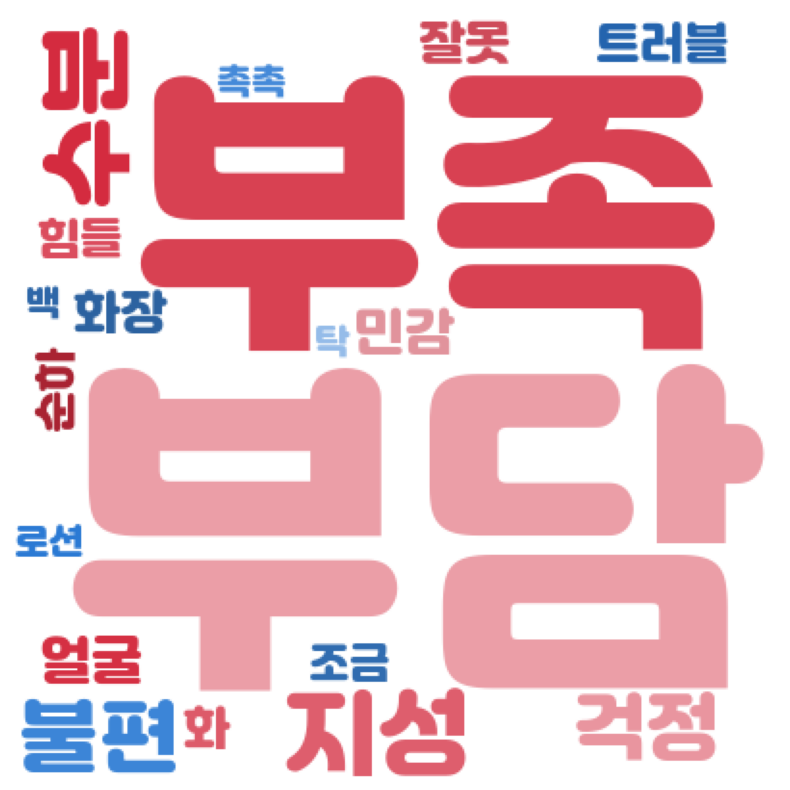

In [36]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue) 지정
    hue_choices = [212,353]    #np.random.randint(50, 100)   # 색상의 기본 톤 hsl(212, 66%, 36%) hsl(353, 57%, 81%) 
    hue = np.random.choice(hue_choices)
    # 채도(saturation) 지정
    saturation_choices = [66,57]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(36, 81)   # 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Suncare_all_negative_wordcloud') #파일 저장 

## 긍정

In [37]:
unique_positive_df_sorted


,단어,빈도
0,잘,969
1,만족,638
2,발리,419
3,습니다,354
4,되,346
5,사,259
6,서,211
7,ᆸ니다,194
8,주,192
9,보,191


In [38]:
#긍정
#불필요한 단어 제거
df_word2 = unique_positive_df_sorted.drop(index=[3,4,5,6,7,8,9,10,11,16,20,23])
df_word2

,단어,빈도
0,잘,969
1,만족,638
2,발리,419
12,구매,139
13,편하,117
14,제품,106
15,사용,97
17,크림,86
18,친구,84
19,편리,77


In [39]:
# DataFrame -> Dictionary
dic_word2 = df_word2.set_index('단어').to_dict()['빈도']
dic_word2

{'잘': 969,
 '만족': 638,
 '발리': 419,
 '구매': 139,
 '편하': 117,
 '제품': 106,
 '사용': 97,
 '크림': 86,
 '친구': 84,
 '편리': 77,
 '화장': 73,
 '느낌': 72,
 '진정': 59,
 '손': 58,
 '촉촉': 54,
 '얼굴': 46,
 '산뜻': 46,
 '순하': 46}

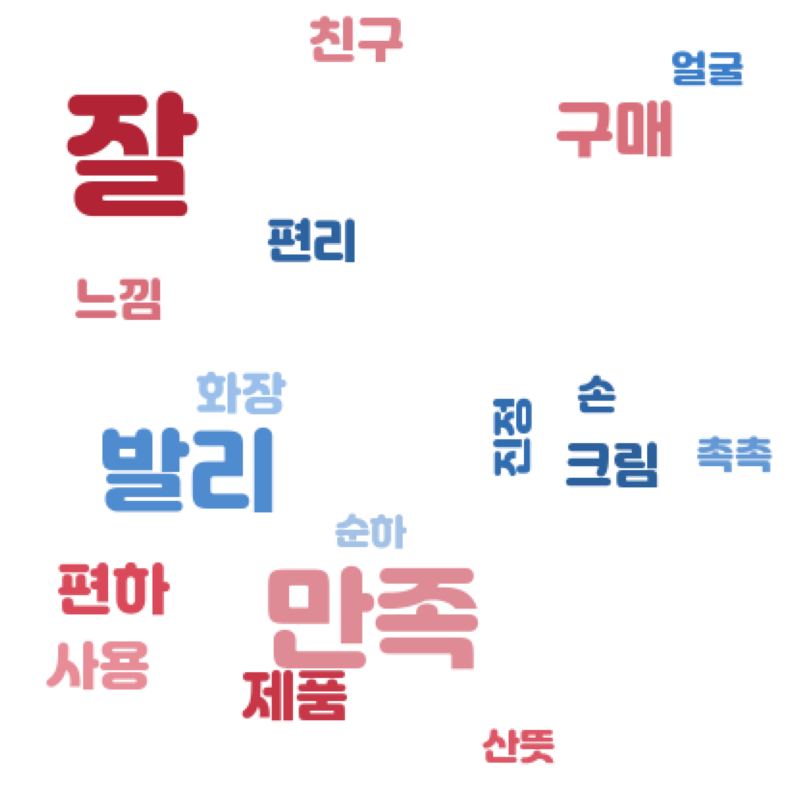

In [49]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue) 지정
    hue_choices = [212,353]    #np.random.randint(50, 100)   # 색상의 기본 톤 hsl(212, 66%, 36%) hsl(353, 57%, 81%) 
    hue = np.random.choice(hue_choices)
    # 채도(saturation) 지정
    saturation_choices = [66,57]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(36, 81)   # 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word2)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Suncare_all_positive_wordcloud') #파일 저장